## Exploratory analysis

In [49]:
import pandas as pd
dtypes = {
    'Service': str,
    'CPT Description': str
}

file_path = '/Users/shubanranganath/Desktop/hackirvine-proj/2022_Q1_OR_Utilization.csv'
date_columns = ['Date', 'OR Schedule','Wheels In', 'Start Time','End Time','Wheels Out']
data = pd.read_csv(file_path, parse_dates=date_columns,dtype=dtypes)
print(data)

      index  Encounter ID       Date  OR Suite      Service  CPT Code  \
0         0         10001 2022-01-03         1     Podiatry     28110   
1         1         10002 2022-01-03         1     Podiatry     28055   
2         2         10003 2022-01-03         1     Podiatry     28297   
3         3         10004 2022-01-03         1     Podiatry     28296   
4         4         10005 2022-01-03         2  Orthopedics     27445   
...     ...           ...        ...       ...          ...       ...   
2167   2167         12168 2022-03-31         7   Pediatrics     69421   
2168   2168         12169 2022-03-31         7   Pediatrics     69421   
2169   2169         12170 2022-03-31         8  Orthopedics     27445   
2170   2170         12171 2022-03-31         8  Orthopedics     27445   
2171   2171         12172 2022-03-31         8  Orthopedics     27130   

                                CPT Description  Booked Time (min)  \
0      Partial ostectomy, fifth metatarsal head      

Basic Info about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              2172 non-null   int64         
 1   Encounter ID       2172 non-null   int64         
 2   Date               2172 non-null   datetime64[ns]
 3   OR Suite           2172 non-null   int64         
 4   Service            2172 non-null   object        
 5   CPT Code           2172 non-null   int64         
 6   CPT Description    2172 non-null   object        
 7   Booked Time (min)  2172 non-null   int64         
 8   OR Schedule        2172 non-null   datetime64[ns]
 9   Wheels In          2172 non-null   datetime64[ns]
 10  Start Time         2172 non-null   datetime64[ns]
 11  End Time           2172 non-null   datetime64[ns]
 12  Wheels Out         2172 non-null   datetime64[ns]
dtypes: datetime64[ns](6), int64(5), o

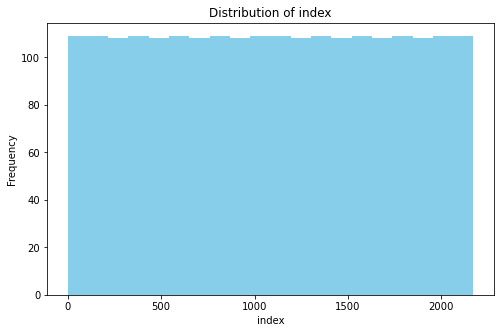

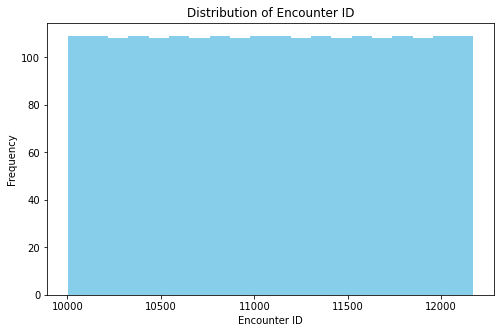

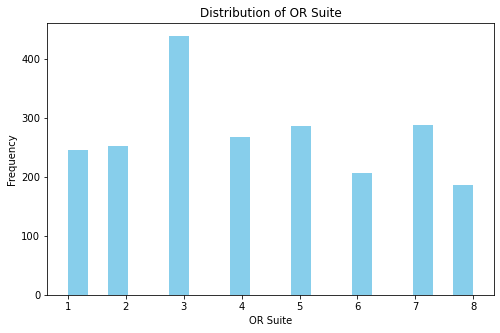

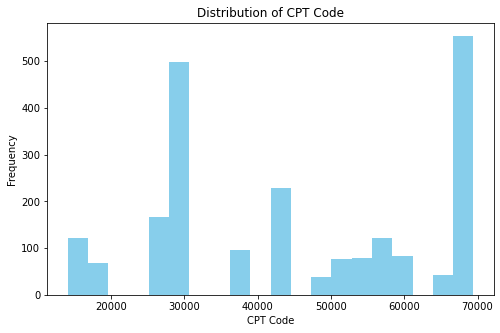

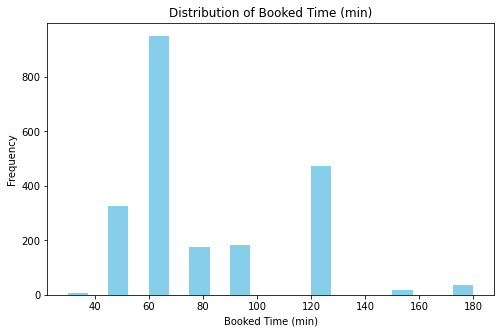

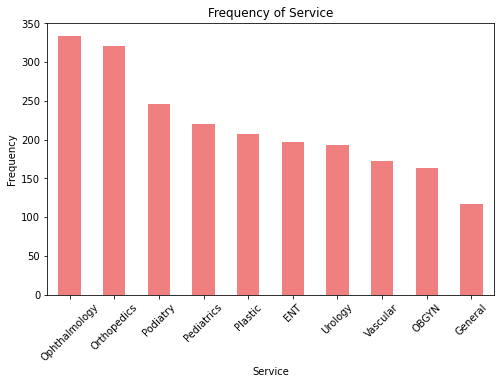

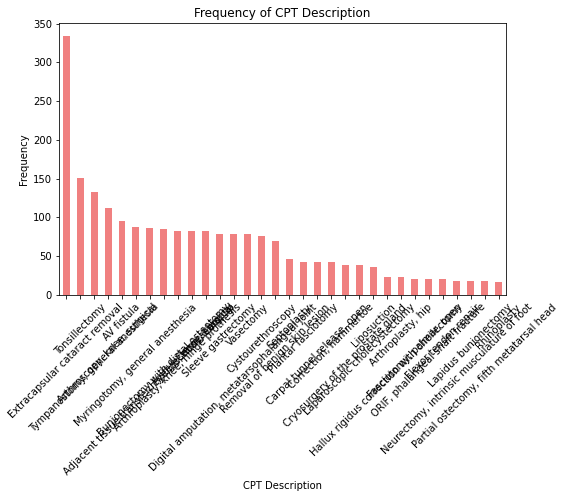

In [37]:
import matplotlib.pyplot as plt

# Display basic information about the dataset
print("Basic Info about the Dataset:")
print(data.info())

# Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(data.describe())

# Count missing values in each column
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Visualize the distribution of numeric columns (histograms)
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Visualize categorical columns (bar plots)
categorical_columns = data.select_dtypes(include=['object'])
for column in categorical_columns.columns:
    plt.figure(figsize=(8, 5))
    data[column].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


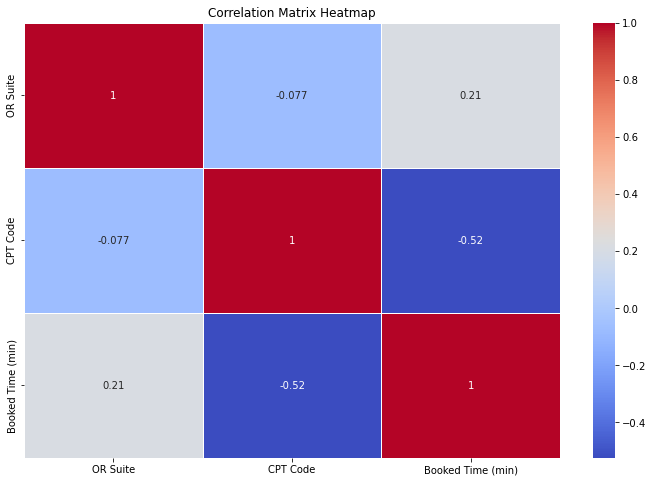

Selected Features based on Correlation Analysis:
Index(['CPT Code', 'OR Suite'], dtype='object')


In [38]:
import seaborn as sns

# Exclude columns: 'index', 'Encounter ID', and all date columns except 'Start Time'
exclude_columns = ['index', 'Encounter ID']
date_columns_to_exclude = ['Date', 'OR Schedule', 'Wheels In', 'End Time', 'Wheels Out']

# Select only the relevant columns for analysis
selected_columns = [col for col in data.columns if col not in exclude_columns and (col == 'Start Time' or col not in date_columns_to_exclude)]
selected_data = data[selected_columns]

# One-hot encode categorical columns
categorical_columns = ['Service', 'CPT Description']  # Add your categorical columns here
selected_data_encoded = pd.get_dummies(selected_data, columns=categorical_columns, drop_first=True)

# Calculate the correlation matrix
correlations = selected_data_encoded.corr()


# Calculate the correlation matrix
correlations = selected_data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Select features with high absolute correlation values
relevant_features = correlations['Booked Time (min)'].abs().sort_values(ascending=False).index
selected_features = relevant_features[1:]  # Exclude the target variable itself
print("Selected Features based on Correlation Analysis:")
print(selected_features)

In [24]:
mask = data.loc[data['CPT Description'] == 'Tonsillectomy']
print(mask['Booked Time (min)'].mean(axis=0))
print(mask['Booked Time (min)'].var(axis=0))

60.0
0.0


In [39]:
data['Actual_time'] = (data['End Time'] - data['Start Time']).dt.total_seconds().div(60).astype(int)
data.dtypes

index                         int64
Encounter ID                  int64
Date                 datetime64[ns]
OR Suite                      int64
Service                      object
CPT Code                      int64
CPT Description              object
Booked Time (min)             int64
OR Schedule          datetime64[ns]
Wheels In            datetime64[ns]
Start Time           datetime64[ns]
End Time             datetime64[ns]
Wheels Out           datetime64[ns]
Actual_time                   int64
dtype: object

In [48]:
import pandas as pd

# Define a custom conversion function to ensure 'Service' and 'CPT Description' as strings
def force_string(x):
    return str(x)

# Read the CSV file, applying the custom function to the relevant columns
df = pd.read_csv('2022_Q1_OR_Utilization.csv')

# Now, 'Service' and 'CPT Description' columns should be treated as strings
df['Service'] = df['Service'].astype('|S')
df['CPT Description'] = df['CPT Description'].astype('|S')
df.dtypes


index                 int64
Encounter ID          int64
Date                 object
OR Suite              int64
Service                |S13
CPT Code              int64
CPT Description        |S50
Booked Time (min)     int64
OR Schedule          object
Wheels In            object
Start Time           object
End Time             object
Wheels Out           object
dtype: object